In [1]:
from collections import deque

# BFS 함수 정의
def bfs(graph, start, visited):
    # deque 라이브러리를 사용한 큐 구현
    queue = deque([start])
    
    # 현재 노드 방문 처리
    visited[start] = True
    
    # 큐가 빌 때까지 반복
    while queue:
        # 큐에서 원소를 뽑아 출력
        v = queue.popleft()
        print(v, end=' ')
        
        # 연결된, 방문하지 않은 원소 큐에 삽입
        for i in graph[v]:
            if not visited[i]:
                queue.append(i)
                visited[i] = True

# 노드 연결 정보 (2차원 리스트)
graph = [
  [],
  [2, 3, 8],
  [1, 7],
  [1, 4, 5],
  [3, 5],
  [3, 4],
  [7],
  [2, 6, 8],
  [1, 7]
]

# 노드 방문 정보 (1차원 리스트)
visited = [False] * 9

# BFS 함수 호출
bfs(graph, 1, visited)

1 2 3 8 7 4 5 6 

In [2]:
from collections import deque
import networkx as nx
import matplotlib.pyplot as plt
import time
from IPython import display

# 수정된 BFS 함수 정의
def bfs(graph, start, visited):
    queue = deque([start])
    visited[start] = True
    
    visited_nodes = []  # 방문한 노드를 기록할 리스트 추가

    while queue:
        v = queue.popleft()
        visited_nodes.append(v)  # 노드 방문 시 visited_nodes에 추가
        
        for i in graph[v]:
            if not visited[i]:
                queue.append(i)
                visited[i] = True

    return visited_nodes  # 방문한 노드들의 리스트를 반환

def draw_bfs_process(graph, visited_nodes):
    G = nx.Graph()
    for i in range(1, len(graph)):
        G.add_node(i)

    for i in range(1, len(graph)):
        for j in graph[i]:
            G.add_edge(i, j)

    pos = nx.spring_layout(G)  # 노드 위치 결정
    colors = ['skyblue'] * len(graph[1:])  # 노드 색상 초기화

    # 각 단계별 시각화
    for i, node in enumerate(visited_nodes):
        colors[node - 1] = 'red'  # 방문한 노드를 빨간색으로 변경
        plt.figure(figsize=(6, 6))
        nx.draw(G, pos, node_color=colors, with_labels=True, font_color='black')
        plt.title(f'Step {i + 1}: Visited Node {node}')
        plt.show()
        
        if i < len(visited_nodes) - 1:  # 마지막 단계가 아니면 지우고 다음 단계로 이동
            display.clear_output(wait=True)
            time.sleep(1)

visited = [False] * 9
visited_nodes = bfs(graph, 1, visited)  # 수정된 bfs 함수 호출
draw_bfs_process(graph, visited_nodes)

TypeError: '_AxesStack' object is not callable

<Figure size 600x600 with 0 Axes>

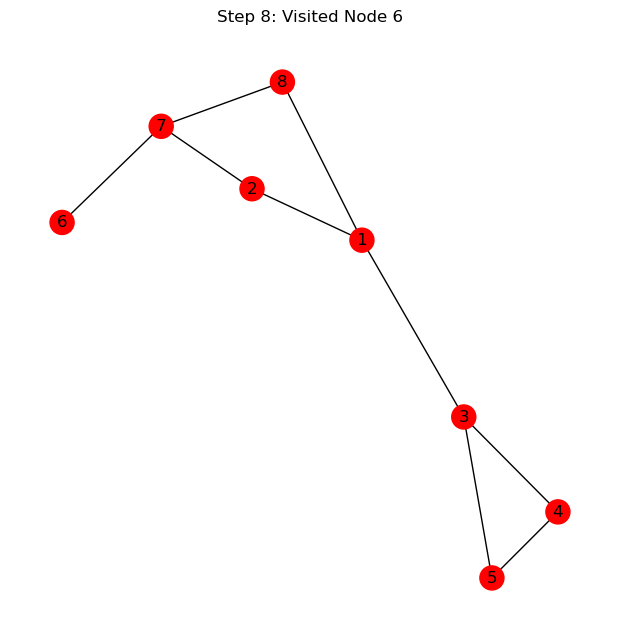

C:\Users\sacer\AppData\Local\Temp\ipykernel_13372\3215621269.py:56: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(image_path))


In [ ]:
import imageio

# 수정된 BFS 함수 정의
def bfs(graph, start, visited):
    queue = deque([start])
    visited[start] = True
    
    visited_nodes = []  # 방문한 노드를 기록할 리스트 추가

    while queue:
        v = queue.popleft()
        visited_nodes.append(v)  # 노드 방문 시 visited_nodes에 추가
        
        for i in graph[v]:
            if not visited[i]:
                queue.append(i)
                visited[i] = True

    return visited_nodes  # 방문한 노드들의 리스트를 반환

def draw_bfs_process(graph, visited_nodes):
    G = nx.Graph()
    for i in range(1, len(graph)):
        G.add_node(i)

    for i in range(1, len(graph)):
        for j in graph[i]:
            G.add_edge(i, j)

    pos = nx.spring_layout(G)  # 노드 위치 결정
    colors = ['skyblue'] * len(graph[1:])  # 노드 색상 초기화

    # 각 단계별 시각화
    for i, node in enumerate(visited_nodes):
        colors[node - 1] = 'red'  # 방문한 노드를 빨간색으로 변경
        plt.figure(figsize=(6, 6))
        nx.draw(G, pos, node_color=colors, with_labels=True, font_color='black')
        plt.title(f'Step {i + 1}: Visited Node {node}')
        plt.show()
        
        if i < len(visited_nodes) - 1:  # 마지막 단계가 아니면 지우고 다음 단계로 이동
            display.clear_output(wait=True)
            time.sleep(1)

    images = []  # 각 단계별 이미지들을 저장할 리스트

    for i, node in enumerate(visited_nodes):
        colors[node - 1] = 'red'
        plt.figure(figsize=(6, 6))
        nx.draw(G, pos, node_color=colors, with_labels=True, font_color='black')
        plt.title(f'Step {i + 1}: Visited Node {node}')
        
        # 그래프를 이미지로 저장
        image_path = f'step_{i + 1}.png'
        plt.savefig(image_path)
        images.append(imageio.imread(image_path))
        plt.close()

    # 이미지 리스트를 사용하여 GIF를 만들고 저장
    imageio.mimsave('bfs_process.gif', images, duration=1)
    
visited = [False] * 9
visited_nodes = bfs(graph, 1, visited)
draw_bfs_process(graph, visited_nodes)